# The Secant Method
Calculate the next estimate of the root from two initial guesses  
x<sub>i+1</sub> = x<sub>i</sub> - (f(x<sub>i</sub>)(x<sub>i</sub> - x<sub>i-1</sub>)/(f(x<sub>i</sub>) - f(x<sub>i-1</sub>)) 
The absolute relative error can be calculated as e = |x<sub>i+1</sub> - x<sub>i</sub>|/|x<sub>i+1</sub>|   
Works with any point as starting point, as long as two initial guesses for each root are made, as x<sub>-1</sub> and x<sub>0</sub>   
The initial guesses allow one to estimate the behaviour of the function near the supposed roots  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function
def f(x):
    return 2*x**3 - 5*x/2 - 5

In [3]:
# Set x_-1 and x_0
x__1 = 1.0
x_0 = 2.0

In [4]:
result = {"Iteration":[0], "x_i-1":[x__1], "x_i":[x_0], "x_i+1":[], "f(x_i+1)":[], "Absolute error %":[]}

In [5]:
# Define the algorithm
def secant_method(x_i_1, x_i):
    x_i__1 = x_i - (f(x_i)*(x_i - x_i_1)/(f(x_i) - f(x_i_1)))
    e = abs((x_i__1 - x_i)/x_i__1)
    return x_i__1, e

In [6]:
x_1, e = secant_method(x__1, x_0)
result["x_i+1"].append(x_1)
result["f(x_i+1)"].append(f(x_1))
result["Absolute error %"].append(e)

In [7]:
x_i_1, x_i = x_0, x_1
n = 9
for i in range(n):
    x_i__1, e = secant_method(x_i_1, x_i)
    
    result["Iteration"].append(i+1)
    result["x_i-1"].append(x_i_1)
    result["x_i"].append(x_i)
    result["x_i+1"].append(x_i__1)
    result["f(x_i+1)"].append(f(x_i__1))
    result["Absolute error %"].append(e)

    if f(x_i__1)==0:
        print("Root found:", x_i__1)
        break
    if (x_i__1 == x_i): 
        print("Precision exceeded")
        break

    x_i_1, x_i = x_i, x_i__1

Precision exceeded


In [8]:
df = pd.DataFrame.from_dict(result)
print(df)

   Iteration     x_i-1       x_i     x_i+1      f(x_i+1)  Absolute error %
0          0  1.000000  2.000000  1.478261 -2.234898e+00      3.529412e-01
1          1  2.000000  1.478261  1.619857 -5.488317e-01      8.741300e-02
2          2  1.478261  1.619857  1.665949  8.242544e-02      2.766661e-02
3          3  1.619857  1.665949  1.659930 -2.385524e-03      3.625623e-03
4          4  1.665949  1.659930  1.660100 -9.873392e-06      1.019695e-04
5          5  1.659930  1.660100  1.660100  1.191145e-09      4.237930e-07
6          6  1.660100  1.660100  1.660100 -8.881784e-16      5.112108e-11
7          7  1.660100  1.660100  1.660100 -8.881784e-16      0.000000e+00


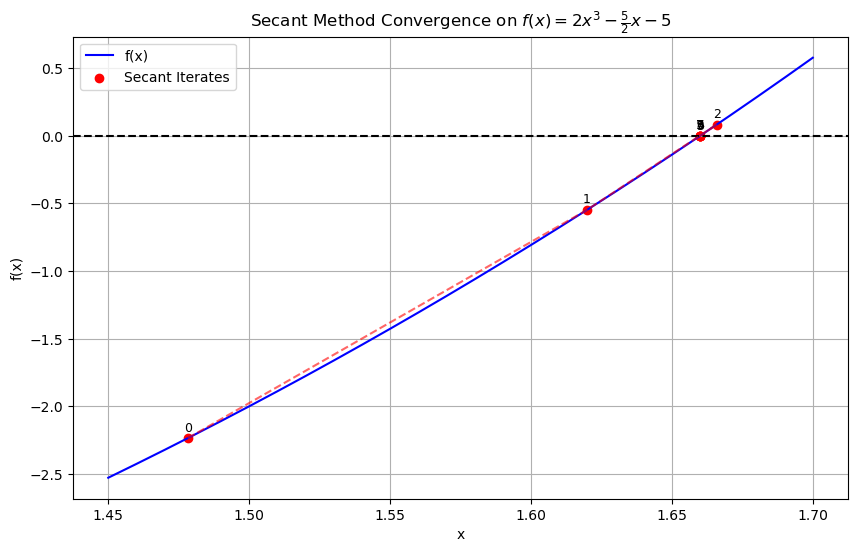

In [17]:
# Convert x_i+1 and f(x_i+1) to numpy arrays for plotting
x_vals = np.array(result["x_i+1"])
y_vals = np.array(result["f(x_i+1)"])

# Plot the function curve
x_plot = np.linspace(1.45, 1.7, 500)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="f(x)", color='blue')
plt.axhline(0, color='black', linestyle='--')

# Plot bisection steps
plt.scatter(x_vals, y_vals, color='red', label='Secant Iterates')
plt.plot(x_vals, y_vals, color='red', linestyle='dashed', alpha=0.6)

# Annotate each iteration
for i, (x, y) in enumerate(zip(x_vals, y_vals)):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.title("Secant Method Convergence on $f(x) = 2x^3 - \\frac{5}{2}x - 5$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()